### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk.corpus import stopwords

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nathennavon/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import numpy as np
import pandas as pd

import json

import psycopg2 as pg2
from psycopg2.extras import RealDictCursor, Json

### Functions

In [4]:
#function to connect to posgres db on ubuntu instance 

def con_cur_to_db():
    con = pg2.connect(host = '13.52.0.109', 
                     dbname = 'postgres',
                     user = 'postgres',
                     password = 'zoolander')
    cur = con.cursor(cursor_factory = RealDictCursor)
    return con, cur

In [5]:
#grabs data from postgres db

def fetch_data(query):
    con, cur = con_cur_to_db()
    cur.execute(query)
    data = cur.fetchall()
    con.close()
    return data

In [6]:
#function to run sql queries in postgres db 

def get_handle_tweets(handle):
    query = f"""
    SELECT * 
    FROM all_data
    Where data->>'handle' = 
    '{handle}'; """
    data = fetch_data(query)
    return data

In [7]:
#transforms list of dicts of dicts to list of dicts 

def extractor(query_result):
    return [*map(lambda x: x['data'], query_result)]

### Loading Data

In [8]:
# Extracting data from db and creating a data frame

labels = ['Acne Studios', 'Akris', 'Alexander McQueen', 'gucci', 'Jimmy Choo', 'PRADA', 'Roberto Cavalli',\
'Stella McCartney', 'TOM FORD'] 

data = []

for label in labels:
    data.extend(get_handle_tweets(label))
    
extracted_data = extractor(data)

fashion_db = pd.DataFrame(extracted_data)
fashion_db.shape

(17518, 4)

In [9]:
fashion_db.handle.value_counts()

gucci                3240
Acne Studios         2000
Stella McCartney     2000
Roberto Cavalli      2000
Alexander McQueen    2000
Jimmy Choo           1999
PRADA                1991
TOM FORD             1290
Akris                 998
Name: handle, dtype: int64

In [4]:
fashion = pd.read_pickle('../data/fashion.pkl')

### EDA & Cleaning

In [89]:
fashion.shape

(9000, 3)

In [90]:
fashion.columns

Index(['created', 'text', 'tweet_id'], dtype='object')

In [91]:
fashion.text[0]

'Presenting a new chapter of #InBloom, Gucci Bloom Acqua di Fiori, a fresh green scent in a campaign featuring #DakotaJohnson, @harinef and @petracollins https://t.co/El1buBhuCU \nPhotographer: #GlenLunchford\nArt director: #ChristopherSimmonds\nCreative director: #AlessandroMichele https://t.co/xkTe1Mtvlk'

In [92]:
fashion.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, gucci to PRADA
Data columns (total 3 columns):
created     9000 non-null datetime64[ns]
text        9000 non-null object
tweet_id    9000 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 601.2+ KB


In [10]:
#switching date of tweet dtype from object to date-time
fashion['created'] = pd.to_datetime(fashion.created)

#setting handle as index
fashion.set_index('handle', inplace=True)

fashion.dtypes

created     datetime64[ns]
text                object
tweet_id             int64
dtype: object

In [37]:
fashion.groupby(fashion.index).size()

handle
Acne Studios         1000
Alexander McQueen    1000
Jimmy Choo           1000
PRADA                1000
Roberto Cavalli      2000
Stella McCartney     1000
TOM FORD             1000
gucci                1000
dtype: int64

In [11]:
fashion.head()

,created,text,tweet_id
handle,,,
gucci,2018-03-21 17:59:41,"Presenting a new chapter of #InBloom, Gucci Bl...",976518722830716931
gucci,2018-03-20 19:00:35,"“It was my way of surviving, to charm people o...",976171664982659073
gucci,2018-03-20 16:00:39,".@MichaelClarkCo reveals, ""Japan is the most a...",976126380206383104
gucci,2018-03-20 13:00:24,In ‘The Performers’ Act VI #Gucci and @british...,976081018347237378
gucci,2018-03-19 20:00:19,"""I have always been fascinated by what is acce...",975824309263454209


### ngrams

In [81]:
#NLTK stop words
stop = stopwords.words('english')
#stop.append(['https', '2018', '2017'])

#sklearn stop words
stop_words = list(ENGLISH_STOP_WORDS)
stop_words.append('https')

#vectorizing words
vect = CountVectorizer(stop_words=stop_words, ngram_range=(2,3))
X = vect.fit_transform(fashion.text)

all_text = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())
all_text.index = fashion.index
all_text.shape

(9000, 124489)

In [70]:
#pd.set_option('display.max_columns', 999)
#pd.set_option('display.max_colwidth', 999)

all_text.head()

,00 gmt,00 gmt 2bconj6d8d,00 gmt offwhitejimmychoo,00 gmt ugikbfzmqs,00 milan,00 milan time,00 pm,00 pm milan,000 risk,000 risk people,...,第2弾はピースサインやテディベア アクネ,第2弾はピースサインやテディベア アクネ ストゥディオズのemojiコレクション,訂正 アクネ,訂正 アクネ ストゥディオズ,送吉祥 roberto,送吉祥 roberto cavalli祝您狗年旺旺旺,進化したデニムコレクションをストアでチェック acnestudiosblakonst,進化したデニムコレクションをストアでチェック acnestudiosblakonst 1kcg5ay8bl,１０ 進化したデニムコレクションをストアでチェック,１０ 進化したデニムコレクションをストアでチェック acnestudiosblakonst
handle,,,,,,,,,,,,,,,,,,,,,
gucci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gucci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gucci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gucci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
gucci,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
all_text.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9000 entries, gucci to PRADA
Columns: 124489 entries, 00 gmt to １０ 進化したデニムコレクションをストアでチェック acnestudiosblakonst
dtypes: int64(124489)
memory usage: 8.3+ GB


In [72]:
ng = []

for label in ['gucci', 'McQueen', 'StellaMcCartney', 'Roberto_Cavalli', 'acnestudios', 'jimmychoo', 'Roberto_Cavalli',\
               'TOMFORD', 'Prada']:
    ng.extend(all_text[all_text.index == label].sum().sort_values(ascending=False).head(25))

In [73]:
gucci_ng           = all_text[all_text.index == "gucci"].sum().sort_values(ascending=False).head(25)
mcqueen_ng         = all_text[all_text.index == "Alexander McQueen"].sum().sort_values(ascending=False).head(25)
stellamccartney_ng = all_text[all_text.index == "Stella McCartney"].sum().sort_values(ascending=False).head(25)
robertocavalli_ng  = all_text[all_text.index == "Roberto Cavalli"].sum().sort_values(ascending=False).head(25)

In [74]:
all_text[all_text.index == "Roberto Cavalli"].sum().sort_values(ascending=False).head(25)

robertocavallifw16 collection                             260
justcavallifw16 collection                                148
robertocavalliss17 collection                             142
robertocavalliprefall16 collection                         80
robertocavalli ss18                                        76
collection discover                                        62
chiffon dress                                              60
robertocavallifw16 fashion                                 52
collection featured                                        46
robertocavalli fw17                                        44
total look                                                 42
mini dress                                                 40
collection robertocavallieditorials                        40
robertocavalliresort17 collection                          38
robertocavallifw16 collection robertocavallieditorials     36
evening gown                                               36
long sle

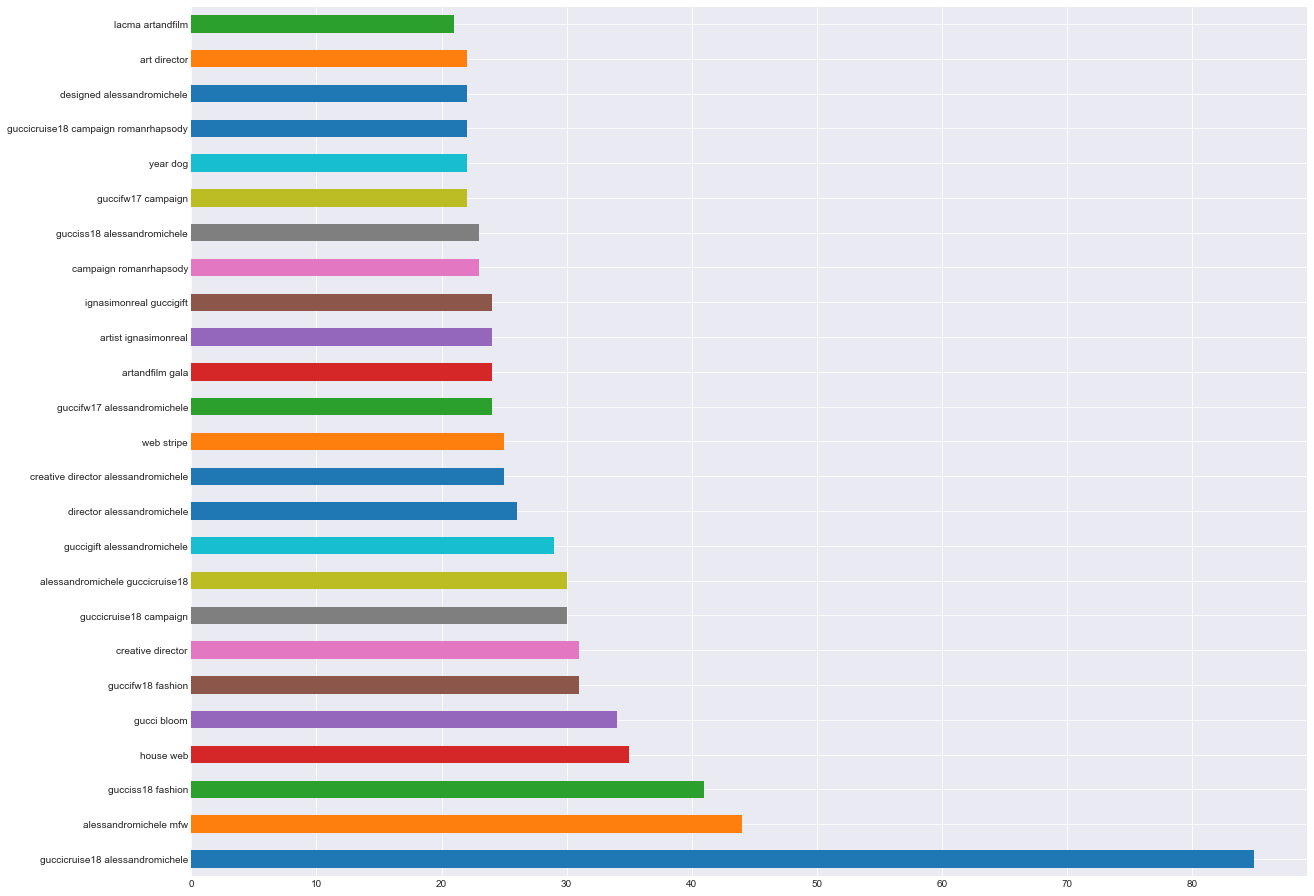

In [75]:
gucci_ng.plot(kind='barh', figsize=(20,16));

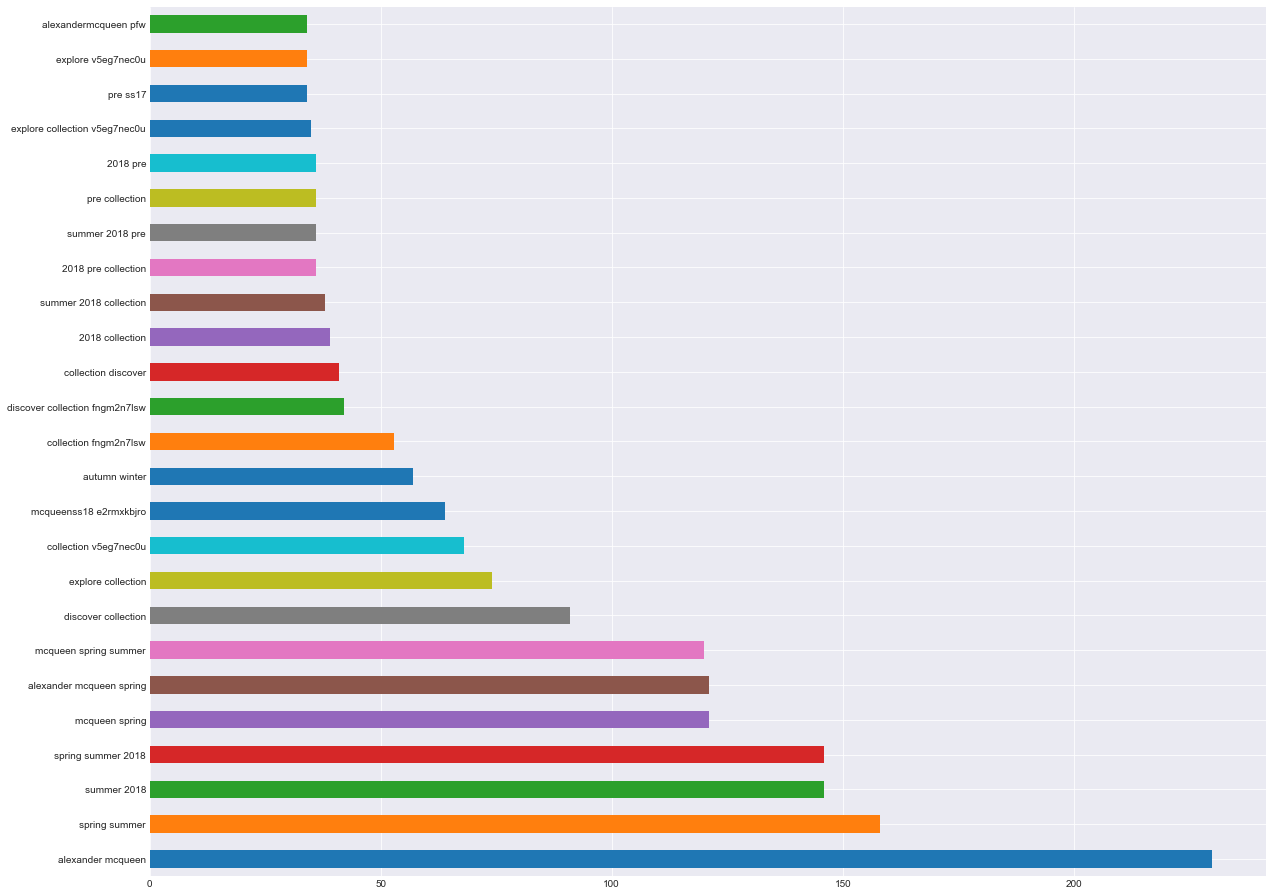

In [76]:
mcqueen_ng.plot(kind='barh', figsize=(20,16));

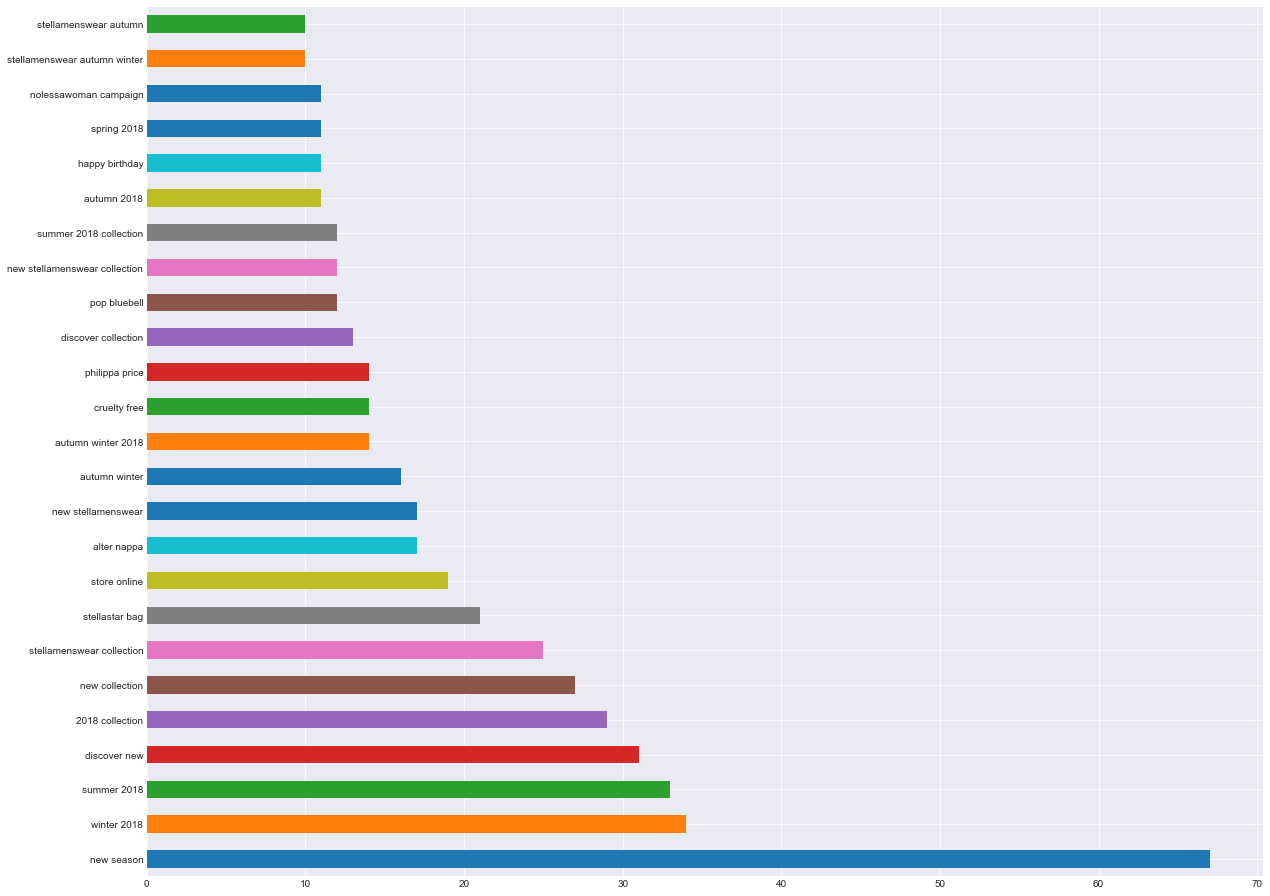

In [77]:
stellamccartney_ng.plot(kind='barh', figsize=(20,16));

In [ ]:
plt.figure(figsize=(12,8))
plt.title('', fontsize=18)
plt.xlabel('')
plt.ylabel('')
plt.plot(kind=barh)
plt.tight_layout()
plt.savefig('visuals/.jpg')